# **AP155 Lab Assignment**
## Module 1: Integrals and Derivatives

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.




### Student Information

_Soldevilla, Thoreenz_: \
_2021-04225_:\
_THU-HX-1_:

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** Thoreenz Soldevilla

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **XX**/100

Score breakdown:
* Problem 1 - XX/30
* Problem 2 - XX/30
* Problem 3 - XX/40

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1
**Integration using the trapezoidal rule and Simpson's rule**

Calculate the integral of the function $ 2x^4 + 3x^2 + 4x + 5$ from $x=0$ to $x=5$.

1. Do the numerical calculation using the trapezoidal rule with 10, 100, and 1,000 slices. Describe each step of the calculation clearly and concisely. *(10 pts.)*

2. What are the percentage errors of your answers in (1)? *(10 pts.)*

3. Repeat the calculation using Simpson's rule with 10, 100, and 1,000 slices. Describe each step of the calculation clearly and concisely. *(5 pts.)*

4. What are the percentage errors of your answers in (3)? How do they compare with the results from (1) for the same number of slices? *(5 pts.)*

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
def int_trap(f, x_min, x_max, x_res, **kwargs):
    eval_x = np.linspace(x_min, x_max, x_res)
    y = f(eval_x, **kwargs)
    h = eval_x[1] - eval_x[0]
    area = h*(np.sum(y)-0.5*y[0]-0.5*y[-1])
    return area

In [34]:
print(np.linspace(0,5,10))

[0.         0.55555556 1.11111111 1.66666667 2.22222222 2.77777778
 3.33333333 3.88888889 4.44444444 5.        ]


In [37]:
def f(x):
    return 2*x**4+3*x**2+4*x+5
int_trap(f, 0, 5, 1000)

1450.002150131237

In [38]:
def int_simp(f, N, a, b):
    h = (b-a)/N
    s = f(a) + f(b)
    for k in range(1,N,2):
        s += 4*f(a+k*h)
    for k in range(2,N,2):
        s += 2*f(a+k*h)
    s = s*(1/3)*h
    return s

In [39]:
int_simp(f, 100, 0, 5)

1450.0000083333337

### PROBLEM 2

**Integration using Gaussian quadrature**

Calculate the integral from Problem 1 using the Gaussian quadrature method: $ 2x^4 + 3x^2 + 4x + 5$ from $x=0$ to $x=5$.

1. Define the function $\tt gaussxw$ from Appendix E of the Newman text (and run the cell). *(10 pts.)*

2. Calculate the integral using the $\tt gaussxw$ function in (1) and number of slices $N = 3$. Describe each step in the calculation clearly and concisely. *(20 pts.)*

In [42]:
def gaussxw(f, N):
    # Initial approximation to roots of the legendre polynomial
    a = np.linspace(3,4*N-1,N)/(4*N+2)
    x = np.cos(np.pi*a+1/(8*N*N*np.tan(a)))
    
    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = np.ones(N, float)
        p1 = np.copy(x)
        for k in range(1,N):
            p0, p1 = p1, ((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))
    
    #Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)
    
    return x, w

def int_gauss(f, N, a, b):
    x,w = gaussxw(f, N)
    xp = 0.5*(b-a)*x + 0.5*(b+a)
    wp = 0.5*(b-a)*w
    s = 0.0
    for k in range(N):
        s += wp[k]*f(xp[k])
    return s

In [43]:
int_gauss(f, 10, 0, 5)

1450.0000000000107

### PROBLEM 3

**Physics Application: Anharmonic Oscillator**

_Refer to Exercise 5.10 of the Newman text._ Consider an anharmonic oscillator with potential $V(x)$ symmetric about $x = 0$. Let us set our anharmonic oscillator going with amplitude $a$. That is, at $t = 0$ we release it from rest at position $x = a$ and it swings back towards the origin. Then at $t = 0$ we have $dx/dt = 0$ and the equation for its total energy becomes $E = V(a)$, i.e., the total energy of the particle is given in terms of the amplitude.

When the particle reaches the origin for the first time, it has gone through one quarter of a period of the oscillator. The period $T$ is given by: $$ T = \sqrt{8m} \int_0^a \frac{dx}{\sqrt{V(a)-V(x)}}. $$

1. Suppose the potential is $V(x) = x^4$ and the mass of the particle is $m = 1$. Write a Python function that calculates the period of the oscillator for given amplitude a using Gaussian quadrature with $N = 20$ points. Describe each step clearly and concisely. *(20 pts.)*

2. Use your function to make a graph of the period for amplitudes ranging from $a = 0$ to $a = 2$. Describe the behavior you find and explain these results clearly and concisely. *(20 pts.)*

In [60]:
def T(V, a, x):
    return (8/(V(a)-V(x)))**0.5 

def T_integ(V, N, a, amp):
    x,w = gaussxw(f, N)
    xp = 0.5*(amp-a)*x + 0.5*(amp+a)
    wp = 0.5*(amp-a)*w
    s = 0.0
    for k in range(N):
        s += wp[k]*T(V, amp, xp[k])
    return s

In [66]:
def V(x):
    return x**4
int_gauss(V, 20, 0, 1)

0.20000000000000118

[0.2, 0.4, 0.6000000000000001, 0.8, 1.0, 1.2, 1.4, 1.5999999999999999, 1.7999999999999998, 1.9999999999999998] [6.40000000000004e-05, 0.002048000000000013, 0.015552000000000106, 0.06553600000000041, 0.20000000000000118, 0.49766400000000305, 1.0756480000000064, 2.097152000000011, 3.7791360000000203, 6.400000000000033]


<function matplotlib.pyplot.show(*args, **kw)>

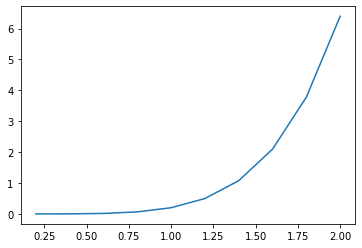

In [70]:
x_data = []
y_data = []

x_start=0

for i in range(10):
    x_start += 0.2
    x_data.append(x_start)
    y_data.append(int_gauss(V, 20, 0, x_start))
    
print(x_data, y_data)

x_data_np = np.array(x_data)
y_data_np = np.array(y_data)

plt.plot(x_data_np, y_data_np)
plt.show